In [3]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [4]:
import pandas as pd
import re
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import matplotlib.pyplot as plt

In [5]:
trans_pairs = pd.read_csv('data/mt.translatedsentence_complete.csv')
trans_pairs.head()

,id,translatedSet,src,tgt
0,11492,Admin | Test Corpus Identity | Hindi -> English,"&quot; देखो बाला भैया , मुझे क्या मिला है , एक...",NaN
1,11491,Admin | Test Corpus Identity | Hindi -> English,&quot; प्रिया ने कहा,NaN
2,11490,Admin | Test Corpus Identity | Hindi -> English,"पमबरम नाम के लट्टू , के तो जैसे कान खड़े हो गये...",NaN
3,11489,Admin | Test Corpus Identity | Hindi -> English,अलमारी में सबसे नीचे पड़े - पड़े मैं बिलकुल उकता...,NaN
4,11488,Admin | Test Corpus Identity | Hindi -> English,&apos; बाला ने कपड़े से धूल में पड़े लट्टू को सा...,NaN


In [6]:
trans_pairs[trans_pairs['src'] == 'हैरान होकर मैंने अपने आसपास देखा']

,id,translatedSet,src,tgt
666,10826,Test User 301 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,NaN
1324,10168,Test User 801 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,I looked around with surprise .
1482,10010,Test User 1001 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,NaN
1736,9756,Test User 901 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me
1814,9640,Test User 701 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me
1855,9599,Test User 1101 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,Surprised I look around me .
2276,9104,Admin | Turtle Story MT L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,NaN
2629,8696,Test User 401 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,"Surprised, I looked around myself."
2880,8445,Test User | Turtle Story PE L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,"Astonished, I looked around myself."
3211,8110,Test User 601 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Suddenly i looked around myself


In [7]:
trans_pairs = trans_pairs.replace(np.nan, '', regex=True)

In [8]:
trans_pairs = trans_pairs[trans_pairs['translatedSet'].str.contains("Test User")]

In [9]:
def break_user(x):
    xs1 = x.split('|')
    
    if len(xs1) > 1:
        return xs1[0]
        
def breakdown_level(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-1]
    return ''

def breakdown_type(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-2]
    return ''

def breakdown_story(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return ' '.join(xs2[:-2])
    return ''

def breakdown_direction(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        return xs1[2].strip()

In [10]:
trans_pairs['user'] = trans_pairs['translatedSet'].apply(lambda x: break_user(x))
trans_pairs['type'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_type(x))
trans_pairs['level'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_level(x))
trans_pairs['story'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_story(x))
trans_pairs['direction'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_direction(x))

In [15]:
trans_pairs[(trans_pairs['user'].str.contains('1001')) & (trans_pairs['story'].str.contains('and'))]

,id,translatedSet,src,tgt,user,type,level,story,direction
2820,8505,Test User 1001 | A Helping Hand PE L4 | Hindi ...,थोड़ी सी मदद,Some help,Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2821,8504,Test User 1001 | A Helping Hand PE L4 | Hindi ...,प्रिय,dear,Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2822,8503,Test User 1001 | A Helping Hand PE L4 | Hindi ...,"जो भी हो , तुम जानती ही हो कि तुम कौन हो","whatever happens , you know who you are",Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2823,8502,Test User 1001 | A Helping Hand PE L4 | Hindi ...,और यूँ भी तुम यह पत्र कभी नहीं देख पाओगी,and even though you will never be able to see ...,Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2824,8501,Test User 1001 | A Helping Hand PE L4 | Hindi ...,मैडम ने कहा था कि मुझे तुम्हारी मदद करनी है और...,"Madam said , "" I have to help you and show you...",Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2825,8500,Test User 1001 | A Helping Hand PE L4 | Hindi ...,लेकिन उन्होंने मुझे इस बारे में और कुछ नहीं बत...,But they didn't tell me anything else about this,Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2826,8499,Test User 1001 | A Helping Hand PE L4 | Hindi ...,"स्कूल से घर लौटते हुए अली , गौरव , सुमी और रान...","on the way back from school to home, Gaurav, A...",Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2827,8498,Test User 1001 | A Helping Hand PE L4 | Hindi ...,"मैंने बात टालने की कोशिश की , लेकिन मुझे तो मा...",I tried to avoid the topic but I was aware of ...,Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2828,8497,Test User 1001 | A Helping Hand PE L4 | Hindi ...,मैंने उनसे कहा कि पता नहीं तुम लोग किस चीज़ के...,"I told them, I don't know what are you talking...",Test User 1001,PE,L4,A Helping Hand,Hindi -> English
2829,8496,Test User 1001 | A Helping Hand PE L4 | Hindi ...,लेकिन यह बात सच नहीं थी,But it was not true,Test User 1001,PE,L4,A Helping Hand,Hindi -> English


In [9]:
# trans_pairs = trans_pairs[trans_pairs['direction'] == 'English -> Hindi']
trans_pairs = trans_pairs[trans_pairs['direction'] == 'Hindi -> English']

In [10]:
trans_pairs = trans_pairs[trans_pairs['type'] != '']

In [11]:
def f(x):
    return pd.Series({'src': "%s" % ' '.join(x['src']),
                    'tgt': "%s" % ' '.join(x['tgt']), 
                  })

In [12]:
trans_pairs["spacy"] = trans_pairs["tgt"].apply(lambda x: nlp(x))
# trans_stories = trans_pairs.groupby('translatedSet').apply(f)
# len(trans_pairs)
# trans_pairs.head()

In [ ]:
# trans_stories.reset_index(level=0, inplace=True)
# trans_stories.head()

In [108]:
trans_stories['user'] = trans_stories['translatedSet'].apply(lambda x: break_user(x))
trans_stories['type'] = trans_stories['translatedSet'].apply(lambda x: breakdown_type(x))
trans_stories['level'] = trans_stories['translatedSet'].apply(lambda x: breakdown_level(x))
trans_stories['story'] = trans_stories['translatedSet'].apply(lambda x: breakdown_story(x))
trans_stories['direction'] = trans_stories['translatedSet'].apply(lambda x: breakdown_direction(x))

In [112]:
for index, row in trans_pairs.iterrows():
    src = row["src"]
    tgt = row["tgt"]
    if tgt == '':
        trans_pairs.at[index,'score'] = 0.0
    else:
        spacy_main = row["spacy"]
        collect = trans_pairs[trans_pairs['src'] == src]
        simi = 0.0
        count = 0
        for ind, ro in collect.iterrows():
            if ro['tgt'] != '':
                simi += spacy_main.similarity(ro["spacy"])
                count += 1
        if count > 0:
            trans_pairs.at[index,'score'] = (simi/count)
        else:
            trans_pairs.at[index,'score'] = simi

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

In [113]:
trans_pairs[trans_pairs['src'] == 'मेरी आँख खुली']

,id,translatedSet,src,tgt,user,type,level,story,direction,spacy,score
856,10636,Test User 301 | Under My Bed PE L2 | Hindi -> ...,मेरी आँख खुली,My eyes opened.,Test User 301,PE,L2,Under My Bed,Hindi -> English,"(My, eyes, opened, .)",0.903137
1401,10091,Test User 1201 | Under My Bed BL L2 | Hindi ->...,मेरी आँख खुली,,Test User 1201,BL,L2,Under My Bed,Hindi -> English,(),0.000000
2127,9253,Test User 801 | Under My Bed MT L2 | Hindi -> ...,मेरी आँख खुली,My eyes opened .,Test User 801,MT,L2,Under My Bed,Hindi -> English,"(My, eyes, opened, .)",0.903137
2693,8632,Test User 1101 | Under My Bed MT L2 | Hindi ->...,मेरी आँख खुली,,Test User 1101,MT,L2,Under My Bed,Hindi -> English,(),0.000000
2779,8546,Test User 1001 | Under My Bed MT L2 | Hindi ->...,मेरी आँख खुली,My eyes opened,Test User 1001,MT,L2,Under My Bed,Hindi -> English,"(My, eyes, opened)",0.895110
2964,8361,Test User 701 | Under My Bed MT L2 | Hindi -> ...,मेरी आँख खुली,I wake up,Test User 701,MT,L2,Under My Bed,Hindi -> English,"(I, wake, up)",0.758592
3176,8149,Test User 901 | Under My Bed MT L2 | Hindi -> ...,मेरी आँख खुली,My eye open,Test User 901,MT,L2,Under My Bed,Hindi -> English,"(My, eye, open)",0.874949
3759,7562,Test User 401 | Under My Bed PE L2 | Hindi -> ...,मेरी आँख खुली,My eyes open.,Test User 401,PE,L2,Under My Bed,Hindi -> English,"(My, eyes, open, .)",0.896865
3976,7345,Test User 501 | Under My Bed PE L2 | Hindi -> ...,मेरी आँख खुली,My eyes open,Test User 501,PE,L2,Under My Bed,Hindi -> English,"(My, eyes, open)",0.894327
4105,7217,Test User | Under My Bed PE L2 | Hindi -> English,मेरी आँख खुली,My eye opened..,Test User,PE,L2,Under My Bed,Hindi -> English,"(My, eye, opened, ..)",0.884275


In [114]:
del trans_pairs["spacy"]

In [115]:
trans_pairs.to_csv("data/mt.trans_pairs_score_withbleu.csv")

-------------------------------------------------------------------------------------------

In [116]:
trans_pairs = pd.read_csv("data/mt.trans_pairs_score_withbleu.csv")

In [156]:
def break_user(x):
    xs1 = x.split('|')
    
    if len(xs1) > 1:
        return xs1[0]
        
def breakdown_level(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-1]
    return ''

def breakdown_type(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return xs2[-2]
    return ''

def breakdown_story(x):
    xs1 = x.split('|')
    if len(xs1) > 1:
        xs2 = xs1[1].split(' ')
        xs2 = list(filter(None, xs2))
        if len(xs2) >= 3:
            if re.match(r"L\d", xs2[-1]):
                return ' '.join(xs2[:-2])
    return ''

In [6]:
trans_pairs['user'] = trans_pairs['translatedSet'].apply(lambda x: break_user(x))
trans_pairs['type'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_type(x))
trans_pairs['level'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_level(x))
trans_pairs['story'] = trans_pairs['translatedSet'].apply(lambda x: breakdown_story(x))

In [117]:
trans_pairs

,Unnamed: 0,id,translatedSet,src,tgt,user,type,level,story,direction,score
0,626,10866,Test User | Jungle Brew MT L4 | Hindi -> English,मसाला चाय,Masala tea.,Test User,MT,L4,Jungle Brew,Hindi -> English,0.869200
1,627,10865,Test User | Jungle Brew MT L4 | Hindi -> English,दक्षिणी भारत में एक छोटे से पहाड़ी खेड़े में बुल...,"In South India, in a small mountain village, t...",Test User,MT,L4,Jungle Brew,Hindi -> English,0.962782
2,628,10864,Test User | Jungle Brew MT L4 | Hindi -> English,"वह अपनी माँ के साथ ऊँचे , हरे पेड़ों से घिरी एक...","She lived with her mother in a hut, surrounded...",Test User,MT,L4,Jungle Brew,Hindi -> English,0.982047
3,629,10863,Test User | Jungle Brew MT L4 | Hindi -> English,इतने ऊँचे और हरे - भरे पेड़ किसी ने कभी न देखे ...,Nobody would have ever seen such tall and gree...,Test User,MT,L4,Jungle Brew,Hindi -> English,0.971416
4,630,10862,Test User | Jungle Brew MT L4 | Hindi -> English,कोहरे वाले दिन पौधों और पेड़ों की पत्तियों से ओ...,"On the days of fog, when tiny droplets of dew ...",Test User,MT,L4,Jungle Brew,Hindi -> English,0.975707
...,...,...,...,...,...,...,...,...,...,...,...
5096,7094,2381,Test User 301 | All Aboard BL L2 | Hindi -> En...,नीना ने पूछा,Nina asked,Test User 301,BL,L2,All Aboard,Hindi -> English,0.822829
5097,7095,2380,Test User 301 | All Aboard BL L2 | Hindi -> En...,क्या हमें सचमुच यहाँ से जाना ही पड़ेगा,Do we really have to go from here?,Test User 301,BL,L2,All Aboard,Hindi -> English,0.990038
5098,7096,2379,Test User 301 | All Aboard BL L2 | Hindi -> En...,"उसका परिवार कोलकता से दिल्ली जा रहा है , क्यों...","Her family is moving from Kolkata to Delhi, be...",Test User 301,BL,L2,All Aboard,Hindi -> English,0.983031
5099,7097,2378,Test User 301 | All Aboard BL L2 | Hindi -> En...,लेकिन वह ज़रा भी ख़ुश नहीं है,But she is not at all happy.,Test User 301,BL,L2,All Aboard,Hindi -> English,0.978010


In [118]:
trans_pairs['type'].replace('', np.nan, inplace=True)
trans_pairs.dropna(subset=['type'], inplace=True)

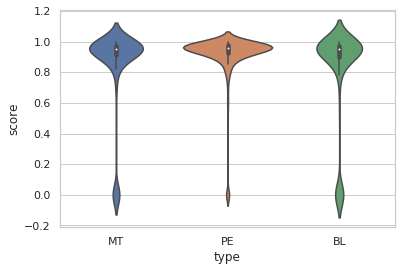

In [119]:
import seaborn as sns
sns.set(style="whitegrid")
sns.violinplot(x="type", y="score", data=trans_pairs)

In [120]:
# Copyright 2017 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Python implementation of BLEU and smooth-BLEU.
This module provides a Python implementation of BLEU and smooth-BLEU.
Smooth BLEU is computed following the method outlined in the paper:
Chin-Yew Lin, Franz Josef Och. ORANGE: a method for evaluating automatic
evaluation metrics for machine translation. COLING 2004.
"""

import collections
import math


def _get_ngrams(segment, max_order):
    """Extracts all n-grams upto a given maximum order from an input segment.
    Args:
        segment: text segment from which n-grams will be extracted.
        max_order: maximum length in tokens of the n-grams returned by this
            methods.
    Returns:
        The Counter containing all n-grams upto max_order in segment
        with a count of how many times each n-gram occurred.
    """
    ngram_counts = collections.Counter()
    for order in range(1, max_order + 1):
        for i in range(0, len(segment) - order + 1):
            ngram = tuple(segment[i:i+order])
            ngram_counts[ngram] += 1
    return ngram_counts


def compute_bleu(reference_corpus, translation_corpus, max_order=4, smooth=False):
    """Computes BLEU score of translated segments against one or more references.
    Args:
        reference_corpus: list of lists of references for each translation. Each
            reference should be tokenized into a list of tokens.
        translation_corpus: list of translations to score. Each translation
            should be tokenized into a list of tokens.
        max_order: Maximum n-gram order to use when computing BLEU score.
        smooth: Whether or not to apply Lin et al. 2004 smoothing.
    Returns:
        3-Tuple with the BLEU score, n-gram precisions, geometric mean of n-gram
        precisions and brevity penalty.
    """
    matches_by_order = [0] * max_order
    possible_matches_by_order = [0] * max_order
    reference_length = 0
    translation_length = 0
    for (references, translation) in zip(reference_corpus, translation_corpus):
        reference_length += min(len(r) for r in references)
        translation_length += len(translation)

        merged_ref_ngram_counts = collections.Counter()
        for reference in references:
            merged_ref_ngram_counts |= _get_ngrams(reference, max_order)
        translation_ngram_counts = _get_ngrams(translation, max_order)
        overlap = translation_ngram_counts & merged_ref_ngram_counts
        for ngram in overlap:
            matches_by_order[len(ngram)-1] += overlap[ngram]
        for order in range(1, max_order+1):
            possible_matches = len(translation) - order + 1
            if possible_matches > 0:
                possible_matches_by_order[order-1] += possible_matches

    precisions = [0] * max_order
    for i in range(0, max_order):
        if smooth:
            precisions[i] = ((matches_by_order[i] + 1.) / (possible_matches_by_order[i] + 1.))
        else:
            if possible_matches_by_order[i] > 0:
                precisions[i] = (float(matches_by_order[i]) / possible_matches_by_order[i])
            else:
                precisions[i] = 0.0

    if min(precisions) > 0:
        p_log_sum = sum((1. / max_order) * math.log(p) for p in precisions)
        geo_mean = math.exp(p_log_sum)
    else:
        geo_mean = 0

    ratio = float(translation_length) / reference_length

    if ratio > 1.0:
        bp = 1.
    else:
        bp = math.exp(1 - 1. / ratio)

    bleu = geo_mean * bp

    return (bleu, precisions, bp, ratio, translation_length, reference_length)

In [121]:
reference = [['No', '.'], ['No', ''], ['No', '.', ''], ['No'], ['No'], ['"No"'], ['No'], ['No'], ['no'], ['No'], ['no'], ['"No."'], ['NO!']]
test = ["No"]

compute_bleu(reference, test, max_order=1, smooth=True)[0]

1.0

In [126]:
trans_pairs.fillna('', inplace=True)

In [123]:
# trans_stories["tgt"]

In [127]:
for j in range(1,5):
    for index, row in trans_pairs.iterrows():
        src = row["src"]
        tgt = row["tgt"]
        collect = trans_pairs[trans_pairs['src'] == src]
        refs = []
        if row["tgt"] != '':
            for ind, ro in collect.iterrows():
                if ro["tgt"] != '':
                    refs.append(ro["tgt"].strip().split(" "))
            trans_pairs.at[index,'bleu-' + str(j)] = compute_bleu(refs, tgt.split(" "), max_order=j, smooth=True)[0]
        else:
            trans_pairs.at[index,'bleu-' + str(j)] = 0.0

In [139]:
trans_pairs[trans_pairs['src'] == 'हैरान होकर मैंने अपने आसपास देखा']

,Unnamed: 0,id,translatedSet,src,tgt,user,type,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
40,666,10826,Test User 301 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,,Test User 301,PE,L4,Turtle Story,Hindi -> English,0.000000,0,0.000000,0.000000,0.000000
675,1324,10168,Test User 801 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,I looked around with surprise .,Test User 801,MT,L4,Turtle Story,Hindi -> English,0.951077,0.851852,0.830418,0.828116,0.832589
833,1482,10010,Test User 1001 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,,Test User 1001,MT,L4,Turtle Story,Hindi -> English,0.000000,0,0.000000,0.000000,0.000000
1087,1736,9756,Test User 901 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me,Test User 901,MT,L4,Turtle Story,Hindi -> English,0.960386,0.96,0.929516,0.910977,0.894320
1165,1814,9640,Test User 701 | Turtle Story MT L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Surprised I looked around me,Test User 701,MT,L4,Turtle Story,Hindi -> English,0.960386,0.96,0.929516,0.910977,0.894320
1206,1855,9599,Test User 1101 | Turtle Story MT L4 | Hindi ->...,हैरान होकर मैंने अपने आसपास देखा,Surprised I look around me .,Test User 1101,MT,L4,Turtle Story,Hindi -> English,0.960666,0.958333,0.922958,0.900477,0.879158
1719,2629,8696,Test User 401 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,"Surprised, I looked around myself.",Test User 401,PE,L4,Turtle Story,Hindi -> English,0.964136,0.935484,0.929260,0.906849,0.887883
1970,2880,8445,Test User | Turtle Story PE L4 | Hindi -> English,हैरान होकर मैंने अपने आसपास देखा,"Astonished, I looked around myself.",Test User,PE,L4,Turtle Story,Hindi -> English,0.954401,0.9375,0.812233,0.737769,0.694385
2289,3211,8110,Test User 601 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,Suddenly i looked around myself,Test User 601,PE,L4,Turtle Story,Hindi -> English,0.944375,0.892857,0.788110,0.751833,0.729572
2330,3252,8069,Test User 501 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,"Surprisedly, I looked around me.",Test User 501,PE,L4,Turtle Story,Hindi -> English,0.957950,0.896552,0.820008,0.777878,0.754227


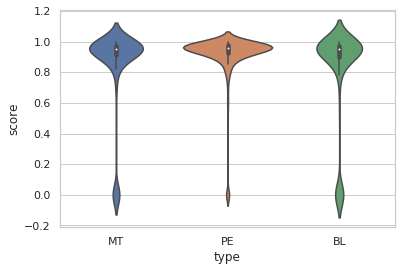

In [129]:
import seaborn as sns
sns.set(style="whitegrid")
sns.violinplot(x="type", y="score", data=trans_pairs)

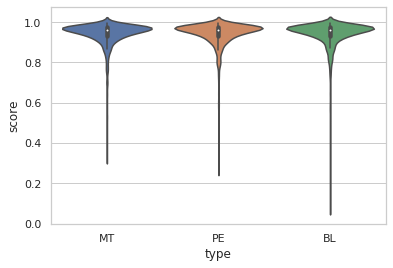

In [130]:
import seaborn as sns
sns.set(style="whitegrid")
sns.violinplot(x="type", y="score", data=trans_pairs[trans_pairs['tgt'] != ''])

In [195]:
nonblankdf = trans_pairs[trans_pairs['tgt'] != ''].groupby('type').count()

In [200]:
totaldf = trans_pairs.groupby('type').count()

In [201]:
nonblankdf.divide(totaldf)

,Unnamed: 0,id,translatedSet,src,tgt,user,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
type,,,,,,,,,,,,,,
BL,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768,0.865768
MT,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092,0.903092
PE,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065,0.976065


NameError: name 'trans_pairs' is not defined

In [13]:
trans_pairs[trans_pairs['tgt'] != ''].groupby(['level','type']).mean()

DataError: No numeric types to aggregate

In [202]:
nonblankdf_level = trans_pairs[trans_pairs['tgt'] != ''].groupby(['level','type']).count()

In [203]:
totaldf_level = trans_pairs.groupby(['level','type']).count()

In [204]:
nonblankdf_level.divide(totaldf_level)

Unnamed: 0        id  translatedSet       src       tgt      user  \
level type                                                                      
L1    BL      0.861004  0.861004       0.861004  0.861004  0.861004  0.861004   
      MT      1.000000  1.000000       1.000000  1.000000  1.000000  1.000000   
      PE      1.000000  1.000000       1.000000  1.000000  1.000000  1.000000   
L2    BL      0.876543  0.876543       0.876543  0.876543  0.876543  0.876543   
      MT      0.930168  0.930168       0.930168  0.930168  0.930168  0.930168   
      PE      1.000000  1.000000       1.000000  1.000000  1.000000  1.000000   
L3    BL      0.823224  0.823224       0.823224  0.823224  0.823224  0.823224   
      MT      0.897924  0.897924       0.897924  0.897924  0.897924  0.897924   
      PE      1.000000  1.000000       1.000000  1.000000  1.000000  1.000000   
L4    BL      0.911828  0.911828       0.911828  0.911828  0.911828  0.911828   
      MT      0.844794  0.844794       0.844794  0.844794  0.844794  0.844794   
      PE      0.919450  0.919450       0.919450  0.919450  0.919450  0.919450   

               story  direction     score    bleu-1    bleu-2    bleu-3  \
level type                                                                
L1    BL    0.861004   0.861004  0.861004  0.861004  0.861004  0.861004   
      MT    1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
      PE    1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
L2    BL    0.876543   0.876543  0.876543  0.876543  0.876543  0.876543   
      MT    0.930168   0.930168  0.930168  0.930168  0.930168  0.930168   
      PE    1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
L3    BL    0.823224   0.823224  0.823224  0.823224  0.823224  0.823224   
      MT    0.897924   0.897924  0.897924  0.897924  0.897924  0.897924   
      PE    1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
L4    BL    0.911828   0.911828  0.911828  0.911828  0.911828  0.911828   
      MT    0.844794   0.844794  0.844794  0.844794  0.844794  0.844794   
      PE    0.919450   0.919450  0.919450  0.919450  0.919450  0.919450   

              bleu-4  
level type            
L1    BL    0.861004  
      MT    1.000000  
      PE    1.000000  
L2    BL    0.876543  
      MT    0.930168  
      PE    1.000000  
L3    BL    0.823224  
      MT    0.897924  
      PE    1.000000  
L4    BL    0.911828  
      MT    0.844794  
      PE    0.919450

In [14]:
trans_pairs[trans_pairs['tgt'] != ''].groupby(['level','type']).mean()['bleu-4'].unstack().plot()

DataError: No numeric types to aggregate

In [192]:
qualitydf = trans_pairs.groupby(['user', 'story'])[['score', 'bleu-1', 'bleu-2', 'bleu-3', 'bleu-4']].mean()

In [18]:
# sns.lineplot(x="id", y="score", hue="type", data=trans_pairs[trans_pairs['user'].str.contains('User 901')])

In [193]:
qualitydf.to_csv('./data/quality.csv')

In [20]:
keystrokes['user'] = keystrokes['translatedSet'].apply(lambda x: break_user(x))
keystrokes['type'] = keystrokes['translatedSet'].apply(lambda x: breakdown_type(x))
keystrokes['level'] = keystrokes['translatedSet'].apply(lambda x: breakdown_level(x))
keystrokes['story'] = keystrokes['translatedSet'].apply(lambda x: breakdown_story(x))
keystrokes['total_keys'] = keystrokes['keystrokeseries'].apply(lambda x: len(ast.literal_eval(x)))
keystrokes['total_time'] = keystrokes['keystrokeseries'].apply(lambda x: ast.literal_eval(x)[-1][1])

In [31]:
len(trans_pairs[(trans_pairs['user'].str.contains('User 401')) & (trans_pairs['story'].str.contains('Turtle Story'))])

41

In [37]:
def countsen(series):
    foc = [k[0] for k in series if type(k[0]) == str]
    print(sorted(set(foc)))
    return len(set(foc)) - 1

In [38]:
countsen(ast.literal_eval(keystrokes[(keystrokes['user'].str.contains('User 401')) & keystrokes['story'].str.contains('Turtle Story')]['keystrokeseries'].values[0]))

['Default Layout', 'card10', 'card12', 'card13', 'card14', 'card15', 'card16', 'card4', 'card5', 'card6', 'card7', 'card8', 'card9']


12

In [39]:
trans_pairs[(trans_pairs['user'].str.contains('User 901')) & (trans_pairs['story'].str.contains('Moon and The Cap'))]

,Unnamed: 0,id,translatedSet,src,tgt,score,user,type,level,story,bleu-1,bleu-2,bleu-3,bleu-4
4136,4136,2712,Test User 901 | The Moon and The Cap BL L1 | H...,ज़रा ढूँढिये आज मैंने कौन सी टोपी पहनी है,Go search which cap I'm wearing today,0.943822,Test User 901,BL,L1,The Moon and The Cap,0.684826,0.790768,0.829607,0.849736
4137,4137,2711,Test User 901 | The Moon and The Cap BL L1 | H...,क्या सूरज को टोपी की ज़रूरत है,Does the sun require a cap,0.942857,Test User 901,BL,L1,The Moon and The Cap,0.833333,0.912871,0.941036,0.955443
4138,4138,2710,Test User 901 | The Moon and The Cap BL L1 | H...,आपका क्या ख्याल है,What do you think,0.986719,Test User 901,BL,L1,The Moon and The Cap,0.482982,0.529080,0.545404,0.553754
4139,4139,2709,Test User 901 | The Moon and The Cap BL L1 | H...,हम खुश थे,We were happy,0.977713,Test User 901,BL,L1,The Moon and The Cap,0.441011,0.483103,0.498009,0.505633
4140,4140,2708,Test User 901 | The Moon and The Cap BL L1 | H...,"उस रात , चाँद और मैं , दोनों ने अपनी टोपियाँ प...","That night, the moon and I, both wore our caps...",0.989165,Test User 901,BL,L1,The Moon and The Cap,0.581842,0.607714,0.616591,0.621078
4141,4141,2707,Test User 901 | The Moon and The Cap BL L1 | H...,"चाँद ने भेजी है , माँ ने कहा","The moon sent it, mom said",0.943476,Test User 901,BL,L1,The Moon and The Cap,0.263495,0.286449,0.294537,0.298666
4142,4142,2706,Test User 901 | The Moon and The Cap BL L1 | H...,"अगले दिन , स्कूल के बाद , माँ ने मुझे एक नई चम...","Next day, after school, my gave me a new shiny...",0.978401,Test User 901,BL,L1,The Moon and The Cap,0.750000,0.866025,0.908560,0.930605
4143,4143,2705,Test User 901 | The Moon and The Cap BL L1 | H...,मैं भी मुस्कराया,I also smiled,0.944648,Test User 901,BL,L1,The Moon and The Cap,0.750000,0.866025,0.908560,0.930605
4144,4144,2704,Test User 901 | The Moon and The Cap BL L1 | H...,चाँद ने मेरी टोपी पहनी और खुशी से मुस्कराया,The moon wore my cap and smiled,0.975868,Test User 901,BL,L1,The Moon and The Cap,0.441011,0.483103,0.498009,0.505633
4145,4145,2703,Test User 901 | The Moon and The Cap BL L1 | H...,उसने पुराने पीपल पर मेरी टोपी देखी,It saw my cap on the old peepal tree,0.950161,Test User 901,BL,L1,The Moon and The Cap,0.294155,0.360265,0.385453,0.398699


In [25]:
list_users = list(trans_pairs['user'].unique())
list_stories = list(trans_pairs['story'].unique())

In [68]:
def actions_to_dict_keystrokes(actions):
    keydict = {}
    for a in range(len(actions)):
        if type(actions[a][0]) == str:
            if actions[a][0] not in keydict:
                keydict[actions[a][0]] = {}
            sub = 1
            while True:
                if a + sub < len(actions):
                    if actions[a][1] not in keydict[actions[a][0]]:
                        keydict[actions[a][0]][actions[a][1]] = []
                    if type(actions[a + sub][0]) == str:
                        break
                    keydict[actions[a][0]][actions[a][1]].append(actions[a + sub])
                    sub += 1
                else:
                    break
    return keydict
            

In [69]:
actions_to_dict_keystrokes()

{'Default Layout': {1: [[1, 6392]]},
 'card4': {6427: [[1, 10333], [1, 11403]]},
 'card5': {11410: [[1, 16206]]},
 'card8': {16225: [[1, 20678]], 59762: [[1, 64436]]},
 'card7': {20693: [[1, 21932]], 64451: [[1, 65987]]},
 'card9': {21947: [[1, 24285]], 58328: [[1, 59748]]},
 'card10': {24300: [[1, 27501]], 56731: [[1, 58307]]},
 'card12': {27515: [[1, 29492], [1, 30308]], 54667: [[1, 56716]]},
 'card13': {30315: [[1, 33327], [1, 34269]], 51687: [[1, 54651]]},
 'card15': {34275: [[1, 37916]]},
 'card14': {37931: [[1, 41004]]},
 'card16': {41018: [[1, 51670]]},
 'card6': {66004: [[1, 76445],
   [46, 78507],
   [1, 80242],
   [84, 83216],
   [72, 83488],
   [69, 83632],
   [32, 83712],
   [82, 84824],
   [69, 85168],
   [69, 85336],
   [70, 85592],
   [32, 85728],
   [87, 85984],
   [65, 86264],
   [83, 86577],
   [32, 86816],
   [70, 89488],
   [65, 89712],
   [73, 89920],
   [82, 90160],
   [89, 90248],
   [32, 90504],
   [87, 90688],
   [73, 90848],
   [79, 90857],
   [82, 90968],
   

In [71]:
keystrokes['keydict'] = keystrokes['keystrokeseries'].apply(lambda x: actions_to_dict_keystrokes(ast.literal_eval(x)))

,id,translatedSet,keystrokeseries,trump,user,type,level,story,total_keys,total_time,keydict
0,339,Test User | Jungle Brew MT L4 | Hindi -> English,"[['Default Layout', 1], [1, 8872], ['card37', ...",Y,Test User,MT,L4,Jungle Brew,3347,2342218,"{'Default Layout': {1: [[1, 8872]]}, 'card37':..."
1,338,Test User | At Least I'm Ok MT L3 | Hindi -> E...,"[['Default Layout', 2], [1, 3919], ['card42', ...",Y,Test User,MT,L3,At Least I'm Ok,2900,76956234,"{'Default Layout': {2: [[1, 3919]]}, 'card42':..."
2,337,Test User 301 | Monsoon | Hindi -> English,"[['Default Layout', 2], [1, 7694], ['card0', 7...",Y,Test User 301,,,,432,557295,"{'Default Layout': {2: [[1, 7694]]}, 'card0': ..."
3,336,Test User 301 | Whats That Smell PE L3 | Hindi...,"[['Default Layout', 4], [1, 16561], ['card0', ...",Y,Test User 301,PE,L3,Whats That Smell,3017,3658123,"{'Default Layout': {4: [[1, 16561]]}, 'card0':..."
4,335,Test User 301 | A Helping Hand BL L4 | Hindi -...,"[['Default Layout', 2], [1, 8334], ['card1', 8...",Y,Test User 301,BL,L4,A Helping Hand,2717,2192266,"{'Default Layout': {2: [[1, 8334]]}, 'card1': ..."


In [102]:
# def indistrokes(df, series):
for user in list_users:
    for story in list_stories:
        try:
            count = 0
            df = trans_pairs[(trans_pairs['user'].str.contains(user)) & (trans_pairs['story'].str.contains(story))]
            series = keystrokes[(keystrokes['user'].str.contains(user)) & keystrokes['story'].str.contains(story)]['keydict'].values[0]
            count = 0
            for index, row in df.iloc[::-1].iterrows():
                card = 'card' +  str(count)
                if card in series:
                    trans_pairs.at[index, 'repeat'] = len(series[card])
                    trans_pairs.at[index, 'actions'] = str(series[card])
                else:
                    trans_pairs.at[index, 'repeat'] = -1
                    trans_pairs.at[index, 'actions'] = '{}'
                count += 1
        except:
            pass

In [109]:
trans_pairs[(trans_pairs['user'].str.contains('User 401')) & (trans_pairs['story'].str.contains('Turtle Story'))]

,Unnamed: 0,id,translatedSet,src,tgt,score,user,type,level,story,bleu-1,bleu-2,bleu-3,bleu-4,repeat,actions
0,0,8698,Test User 401 | Turtle Story PE L4 | Hindi -> ...,कछुआ,Tortoise.,0.751917,Test User 401,PE,L4,Turtle Story,0.002076,0.002680,0.002918,0.003045,-1.0,{}
1,1,8697,Test User 401 | Turtle Story PE L4 | Hindi -> ...,सुबह जब मेरी आँख खुली तो आसमान में सूरज चम - च...,"When my eyes opened in the morning, the sun wa...",0.981989,Test User 401,PE,L4,Turtle Story,0.606124,0.670095,0.692886,0.704570,-1.0,{}
2,2,8696,Test User 401 | Turtle Story PE L4 | Hindi -> ...,हैरान होकर मैंने अपने आसपास देखा,"Surprised, I looked around myself.",0.964136,Test User 401,PE,L4,Turtle Story,0.909091,0.953463,0.968729,0.976454,-1.0,{}
3,3,8695,Test User 401 | Turtle Story PE L4 | Hindi -> ...,पहले तो चकरा गई कि मैं हूँ कहाँ फिर एकदम याद आ...,"First I was wondering where I was, then I reme...",0.978314,Test User 401,PE,L4,Turtle Story,0.818182,0.904534,0.935298,0.951070,-1.0,{}
4,4,8694,Test User 401 | Turtle Story PE L4 | Hindi -> ...,"एक असीम नीले संसार के बीचोंबीच , जिसे लोग सागर...","In the middle of an infinite blue world, which...",0.976482,Test User 401,PE,L4,Turtle Story,0.818182,0.904534,0.935298,0.951070,-1.0,{}
5,5,8693,Test User 401 | Turtle Story PE L4 | Hindi -> ...,"चारों ओर नीला , हरा पानी लहरा रहा था और सूरज क...","Blue, green water was sparkling all around and...",0.986500,Test User 401,PE,L4,Turtle Story,0.498920,0.523271,0.531650,0.535889,-1.0,{}
6,6,8692,Test User 401 | Turtle Story PE L4 | Hindi -> ...,मैनें अपने मीनपक्षों ( फ़्लिपर ) १ को पेट त¬ले ...,I collected my meenpaksh (flipper) 1 in my sto...,0.938273,Test User 401,PE,L4,Turtle Story,0.727273,0.852803,0.899289,0.923473,-1.0,{}
7,7,8691,Test User 401 | Turtle Story PE L4 | Hindi -> ...,मुझे नहीं मालूम था कि मैं कहाँ हूँ,I didn't know where I was.,0.971408,Test User 401,PE,L4,Turtle Story,0.727273,0.852803,0.899289,0.923473,-1.0,{}
8,8,8690,Test User 401 | Turtle Story PE L4 | Hindi -> ...,लेकिन जब आसपास नर्म - नर्म धूप बिछी हो और पेटप...,But when there is soft sunshine around and the...,0.980284,Test User 401,PE,L4,Turtle Story,0.449028,0.496419,0.513302,0.521958,-1.0,{}
9,9,8689,Test User 401 | Turtle Story PE L4 | Hindi -> ...,गुनगुनी धूप में मैं भी गुनगुनी हो गई,I also became warm in the warm sun.,0.948656,Test User 401,PE,L4,Turtle Story,0.636364,0.797724,0.860139,0.893154,-1.0,{}


In [108]:
keystrokes[(keystrokes['user'].str.contains('User 401')) & keystrokes['story'].str.contains('Turtle Story')]['keystrokeseries'].values[0]

"[['Default Layout', 1], [1, 6392], ['card4', 6427], [1, 10333], [1, 11403], ['card5', 11410], [1, 16206], ['card8', 16225], [1, 20678], ['card7', 20693], [1, 21932], ['card9', 21947], [1, 24285], ['card10', 24300], [1, 27501], ['card12', 27515], [1, 29492], [1, 30308], ['card13', 30315], [1, 33327], [1, 34269], ['card15', 34275], [1, 37916], ['card14', 37931], [1, 41004], ['card16', 41018], [1, 51670], ['card13', 51687], [1, 54651], ['card12', 54667], [1, 56716], ['card10', 56731], [1, 58307], ['card9', 58328], [1, 59748], ['card8', 59762], [1, 64436], ['card7', 64451], [1, 65987], ['card6', 66004], [1, 76445], [46, 78507], [1, 80242], [84, 83216], [72, 83488], [69, 83632], [32, 83712], [82, 84824], [69, 85168], [69, 85336], [70, 85592], [32, 85728], [87, 85984], [65, 86264], [83, 86577], [32, 86816], [70, 89488], [65, 89712], [73, 89920], [82, 90160], [89, 90248], [32, 90504], [87, 90688], [73, 90848], [79, 90857], [82, 90968], [8, 91600], [8, 91896], [8, 92072], [73, 92416], [82, 92

In [17]:
import json

In [18]:
with open('contex_questions.json', 'r', encoding='utf-8') as f:
    liddata = json.load(f)

In [21]:
for corp in liddata:
    

dict

In [24]:
liddata = pd.read_json('contex_questions.json')

In [27]:
liddata.head()

,answer,query,context,id,language
0,NEFT,National Electronic Funds Transfer ka abbrevia...,RTGS (Real Time Gross Settlement ) aur NEFT (N...,1,Hindi
1,"50,000 rupees",NEFT se aap maximum kitne paise bhej sakte hai...,RTGS (Real Time Gross Settlement ) aur NEFT (N...,2,Hindi
2,2 Lakh rupees,RTGS ki minimum limit kitni hai?,RTGS (Real Time Gross Settlement ) aur NEFT (N...,3,Hindi
3,National Electronic Funds Transfer,NEFT ka full form kya hai?,RTGS (Real Time Gross Settlement ) aur NEFT (N...,4,Hindi
4,transferring large sum of money,RTGS ka use kya hai?,RTGS (Real Time Gross Settlement ) aur NEFT (N...,5,Hindi


In [34]:
import re
def tokenize(corpus):
    return list(filter(None, re.split("[?\.]+", corpus)))

In [45]:
f = open('lidinputquery.txt', 'w', encoding='utf-8')
for index, row in liddata.iterrows():
    rownum = (row["id"])
    f.write(str(rownum) + "\t" + row["query"] + "\n")
f.close()

In [43]:
liddata["contextid"] = pd.factorize(liddata["context"])[0]

In [44]:
liddata.head()

,answer,query,context,id,language,contextid
0,NEFT,National Electronic Funds Transfer ka abbrevia...,RTGS (Real Time Gross Settlement ) aur NEFT (N...,1,Hindi,0
1,"50,000 rupees",NEFT se aap maximum kitne paise bhej sakte hai...,RTGS (Real Time Gross Settlement ) aur NEFT (N...,2,Hindi,0
2,2 Lakh rupees,RTGS ki minimum limit kitni hai?,RTGS (Real Time Gross Settlement ) aur NEFT (N...,3,Hindi,0
3,National Electronic Funds Transfer,NEFT ka full form kya hai?,RTGS (Real Time Gross Settlement ) aur NEFT (N...,4,Hindi,0
4,transferring large sum of money,RTGS ka use kya hai?,RTGS (Real Time Gross Settlement ) aur NEFT (N...,5,Hindi,0


In [50]:
# f = open('lidinputcontext.txt', 'w', encoding='utf-8')

# queries = tokenize(row["context"])
#     for q in range(1, len(queries)+1):
#         f.write(str(rownum + q) + "\t" + queries[q-1] + "\n")
contextdata = liddata[["context", "contextid"]].drop_duplicates()

In [55]:
f = open('lidinputcontext.txt', 'w', encoding='utf-8')
for index, row in contextdata.iterrows():
    rownum = (row["contextid"]+1) * 1000
    contexts = tokenize(row["context"])
    for c in range(0, len(contexts)):
        f.write(str(rownum + c) + "\t" + contexts[c-1] + "\n")
f.close()

In [79]:
with open('lidinputquery.txt_tagged', 'r', encoding="utf-8") as f:
    queries_t = f.readlines()
with open('lidinputcontext_p.txt', 'r', encoding="utf-8") as f:
    contexts_t = f.readlines()

In [84]:
queries = [q.strip().split("\t") for q in queries_t[1::2]]
contexts = [q.strip().split("\t") for q in contexts_t]

In [ ]:
# with open('lidinputcontext.txt_tagged', 'r', encoding="utf-8") as f:
#     contexts_t = f.readlines()

In [74]:
# # count = 1
# # contexts = []
# # loc_context = []
# # for c in contexts_p:
# #     if int(c[0])
# with open('lidinputcontext_p.txt', 'w', encoding="utf-8") as f:
#     f.writelines(contexts_p)

In [85]:
contexts

[['1',
  'Vahi/EN ,/OTHER NEFT/EN mein/HI bhi/HI aisa/EN hi/EN hota/HI hain/HI . RTGS/EN (Real/OTHER Time/EN Gross/EN Settlement/EN )/OTHER aur/EN NEFT/EN (National/OTHER Electronic/EN Funds/EN Transfer)/EN dono/HI hi/EN India/EN mein/HI Online/EN paise/HI bhejne/HI ka/HI jariya/HI hain/HI ,/OTHER Jiske/HI dwara/HI aap/HI alag-alag/HI Bank/EN Accounts/EN mein/HI money/EN transfer/EN kar/HI sakte/HI hain/HI . In/EN dono/EN payment/EN System/EN ko/EN Reserve/EN Bank/EN of/EN India/EN (RBI)/OTHER manage/HI karta/HI hain/HI . In/EN dono/EN payment/EN system/EN ke/EN jariye/HI sirf/HI aap/HI India/EN ke/EN andar/HI hi/EN paise/HI send/EN kar/HI sakte/HI hain/HI . Aaiye/HI jante/HI hain/HI dono/HI mein/HI kya/HI difference/EN hota/HI hain/HI . RTGS/EN mein/EN Funds/EN turant/EN hi/EN transfer/EN ho/EN jate/HI hain/HI . Yeh/EN different/EN Bank/EN ke/EN beech/EN mein/HI fund/EN transfer/EN karne/HI ka/HI sabse/HI fast/EN medium/HI hain/HI . Rule/HI yeh/HI hain/HI ki/HI jis/HI Bank/EN ko/HI pa

In [86]:
liddata["lidquery"] = liddata["id"].apply(lambda x: queries[int(x)-1][1])
liddata["lidcontext"] = liddata["contextid"].apply(lambda x: contexts[int(x)][1])

['</div>/OTHER. Kya/HI aap/HI Rukhe/HI baalo/HI (Dry/OTHER Hair)/EN se/EN preshan/HI hain/HI. Rukhe/HI baalo/HI ko/HI Silky/HI banane/HI ki/HI tips/EN ya/EN Gharelu/HI nuskhe/HI ke/EN baare/HI mein/HI janana/HI chahte/HI hain/HI. kya/HI aap/HI apne/HI ghar/HI ya/EN rasoi/HI mein/HI padi/HI huyi/HI aisi/HI cheezo/HI ke/EN baare/HI mein/HI janana/HI chahte/HI jo/EN aapke/HI baalo/HI ko/HI silky/HI bana/HI de/EN. Inhe/HI lagane/HI ke/HI tarike/HI ke/HI baare/HI mein/HI janana/HI chahte/HI hain/HI to/EN yeh/HI post/EN jaroor/HI padhe/HI. Bejaan/HI aur/HI rukhe/HI baal/HI (Dry/OTHER Hair)/EN kisi/HI ko/HI bhi/HI acche/HI nahi/HI lagte/HI hain/HI. Sabhi/HI yahi/HI chahte/HI hain/HI ki/HI baal/HI silky/HI aur/EN shiny/EN ho/EN. Iske/HI liye/HI jyadatar/HI log/HI kai/HI tarah/HI ke/EN cosmetics/EN ka/HI use/EN karte/HI hain/HI ,/OTHER Lekin/HI inse/HI baal/HI lambe/HI samay/HI tak/HI healthy/EN aur/EN beautiful/EN nahi/HI bane/HI rah/HI sakte/HI hain/HI. Baalo/HI ko/HI sunder/HI banane/HI ke/H

In [102]:
new_contexts = []
for c in contexts:
    con = c[1].split(" . ", 1)
    try:
        new_contexts.append([c[0], con[1] + " . " + con[0]])
    except:
        new_contexts.append(c)

In [103]:
new_contexts

[['1',
  'RTGS/EN (Real/OTHER Time/EN Gross/EN Settlement/EN )/OTHER aur/EN NEFT/EN (National/OTHER Electronic/EN Funds/EN Transfer)/EN dono/HI hi/EN India/EN mein/HI Online/EN paise/HI bhejne/HI ka/HI jariya/HI hain/HI ,/OTHER Jiske/HI dwara/HI aap/HI alag-alag/HI Bank/EN Accounts/EN mein/HI money/EN transfer/EN kar/HI sakte/HI hain/HI . In/EN dono/EN payment/EN System/EN ko/EN Reserve/EN Bank/EN of/EN India/EN (RBI)/OTHER manage/HI karta/HI hain/HI . In/EN dono/EN payment/EN system/EN ke/EN jariye/HI sirf/HI aap/HI India/EN ke/EN andar/HI hi/EN paise/HI send/EN kar/HI sakte/HI hain/HI . Aaiye/HI jante/HI hain/HI dono/HI mein/HI kya/HI difference/EN hota/HI hain/HI . RTGS/EN mein/EN Funds/EN turant/EN hi/EN transfer/EN ho/EN jate/HI hain/HI . Yeh/EN different/EN Bank/EN ke/EN beech/EN mein/HI fund/EN transfer/EN karne/HI ka/HI sabse/HI fast/EN medium/HI hain/HI . Rule/HI yeh/HI hain/HI ki/HI jis/HI Bank/EN ko/HI paisa/HI send/EN kya/HI gya/HI hain/HI usay/EN receiver/EN ke/EN account/

In [106]:
liddata["lidquery"] = liddata["id"].apply(lambda x: queries[int(x)-1][1])
liddata["lidcontext"] = liddata["contextid"].apply(lambda x: new_contexts[int(x)][1])

In [113]:
liddata[['id','answer', 'query','context', 'language', 'lidquery', 'lidcontext']].to_json('./context_lid.json', orient='records')

In [111]:
out = liddata[['id','answer', 'query','context', 'language', 'lidquery', 'lidcontext']].to_json(orient='records')[1:-1].replace('},{', '} {')

In [112]:
out

'{"id":1,"answer":"NEFT","query":"National Electronic Funds Transfer ka abbreviation kya hai?","context":"RTGS (Real Time Gross Settlement ) aur NEFT (National Electronic Funds Transfer) dono hi India mein Online paise bhejne ka jariya hain, Jiske dwara aap alag-alag Bank Accounts mein money transfer kar sakte hain. In dono payment System ko Reserve Bank of  India (RBI) manage karta hain. In dono payment system ke jariye sirf aap India ke andar hi paise send kar sakte hain. Aaiye jante hain dono mein kya difference hota hain. RTGS mein Funds turant hi transfer ho jate hain. Yeh different Bank ke beech mein fund transfer karne ka sabse fast medium hain. Rule yeh hain ki jis Bank ko paisa send kya gya hain usay receiver ke account mein 30 minutes ke andar paisa credit kar dena hota hain. Dusri aor NEFT ke tahat paise turant transfer nahi ho paate hain. Is System mein hours ke according time slot mein kaam hota hain. Isme aapko 2 se 3 ghante aur kabhi-kabhi usse bhi zyada time bhi lag jat